In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import joblib
import seaborn as sns
import matplotlib.pyplot as plt 
import torch 
from helpers import MLP


In [2]:
trained_svm_model = joblib.load('trained_svm.pkl')

trained_mlp_model = joblib.load('trained_mlp.pkl')

#### Testing the Support Vector Machine Model

##### Load SVM data

In [3]:
X_test_scaled = joblib.load('X_test_scaled.pkl')
y_test = joblib.load('y_test.pkl')

In [4]:
y_test_prediction = trained_svm_model.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, y_test_prediction)

print(f'Accuracy of the test set - {test_accuracy}')

Accuracy of the test set - 0.8525899133283287


#### Confusion Matrix and ROC Curve for SVM Test Results

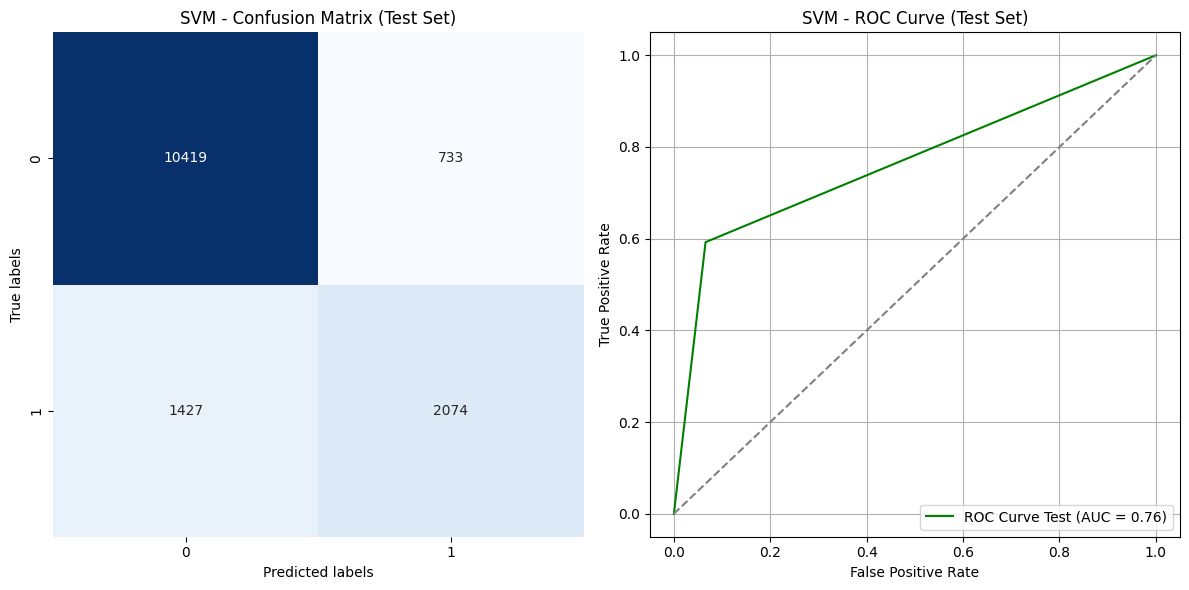

In [5]:
test_confusion_matrix = confusion_matrix(y_test, y_test_prediction)


fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prediction)

roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(test_confusion_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('SVM - Confusion Matrix (Test Set)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')


plt.subplot(1, 2, 2)
plt.plot(fpr_test, tpr_test, color='g', label=f'ROC Curve Test (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM - ROC Curve (Test Set)')
plt.legend(loc='lower right')
plt.grid(True)

plt.tight_layout()
plt.show()

#### Testing the Multi Layer Perceptron Model

##### Load MLP Data

In [6]:
X_test_tensor = torch.load('X_test_tensor.pt')
y_test_tensor = torch.load('y_test_tensor.pt')

In [7]:
y_test_prediction = trained_mlp_model.predict(X_test_tensor)

test_accuracy = accuracy_score(y_test_tensor, y_test_prediction)

print(f'Accuracy of the test set - {test_accuracy}')

Accuracy of the test set - 0.8469937896676448


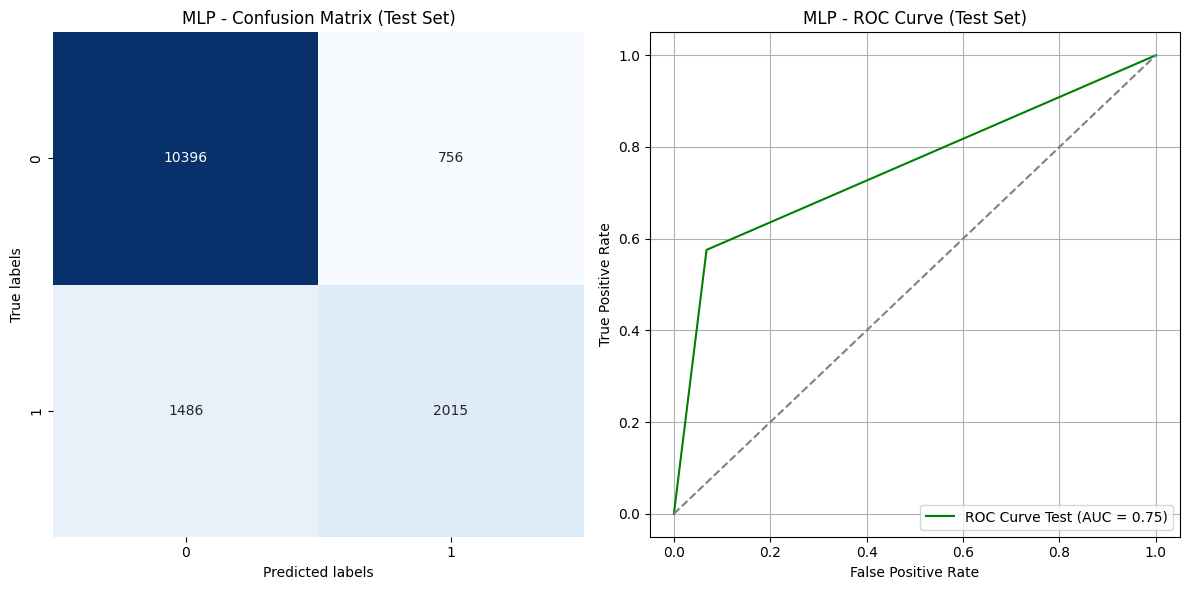

In [8]:
test_confusion_matrix = confusion_matrix(y_test_tensor, y_test_prediction)


fpr_test, tpr_test, _ = roc_curve(y_test_tensor, y_test_prediction)

roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(test_confusion_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('MLP - Confusion Matrix (Test Set)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')


plt.subplot(1, 2, 2)
plt.plot(fpr_test, tpr_test, color='g', label=f'ROC Curve Test (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP - ROC Curve (Test Set)')
plt.legend(loc='lower right')
plt.grid(True)

plt.tight_layout()
plt.show()